# Skewed Data

In [ ]:
#@title ### Run the following cell to download the necessary files for this lesson { display-mode: "form" } 
#@markdown Don't worry about what's in this collapsed cell

!pip install -q scikit-learn
!pip install -q statsmodels


> Skewed data refers to data that are not symmetrically distributed around the mean. The skewness of a probability distribution is a measure of asymmetry of a variable about its mean.

## Types of skew

There are two types of skewness:
- **1. Positive (Right) Skew**: In a positively skewed distribution, the right tail (larger numbers) is longer or fatter than the left. In this case, the mean and the median will be greater than the mode.
- **2. Negative (Left) Skew**: In a negatively skewed distribution, the left tail (smaller numbers) is longer or fatter than the right. Here, the mean and the median will be less than the mode.
<br>
<br>
<img src="images/skew_graphic.png" alt="Types of Skew" width="700" >

Skewness is important to consider in statistical analysis as it can influence the interpretation of the data. Many statistical techniques assume that the data is normally distributed (i.e. not skewed). If data is skewed, it may need to be transformed to use these techniques or alternative non-parametric methods may need to be considered.

## Measuring Skew

You can measure the skewness of data in Python using the `scipy.stats.skew()` function or the `pandas.DataFrame.skew()` function for a `Pandas` DataSeries. Positive values indicate a positive skew, negative values indicate a negative skew, and values close to zero suggest no significant skew (i.e. the data is approximately symmetric).

Let's take a look at one of the columns from the California Housing Dataset from the `sklearn.datasets` module. In this dataset, the `Population` column represents the total number of people residing in a given block group, which is he smallest geographical unit for which the U.S. Census Bureau publishes sample data.

We can see that this distribution is quite strongly positively skewed.

Skew of population column is 4.93585822672712
this indicates a strong positive skew


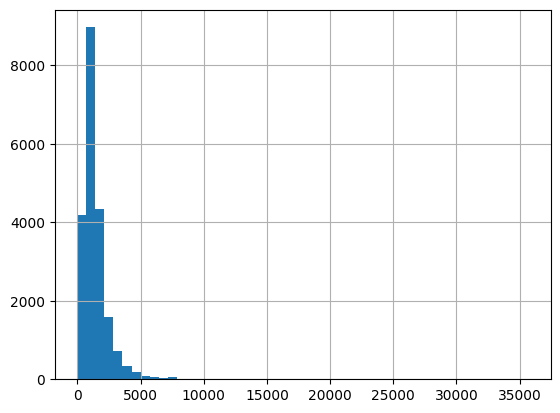

In [7]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

df = fetch_california_housing(as_frame=True).frame
df['Population'].hist(bins=50)
print(f"Skew of population column is {df['Population'].skew()}")
print("this indicates a strong positive skew")



We can look further into this by looking at the output of `df.describe()` and by making a __Q-Q plot__ of sample distribution against a theoretical normal distribution.

If the chosen distribution is appropriate for the data, the points in the Q-Q plot should roughly lie along a straight diagonal line. Deviations from this straight line suggest departures from the assumed distribution.


In [9]:
df['Population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64

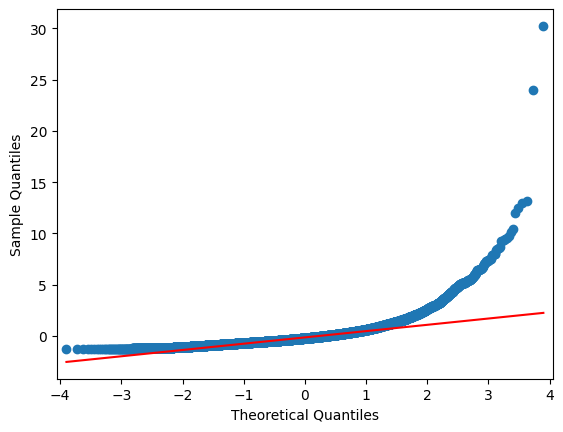

In [15]:
# q-q plot of HouseAge:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


# scaleHouseAge: 


qq_plot = qqplot(df['Population'] , scale=1 ,line='q', fit=True)
pyplot.show()

From these analyses we can confirm that the data are positively skewed, and that this skew is due to both a general tendency for higher values to be over-represented, and because of two very large outliers.

## Reasons to Transform Skewed Data

Transforming skewed data is a common preprocessing step in data analysis, and can be motivated by a variety of factors.

One obvious case in which transformation would be useful is in machine learning, where untransformed skewed data might lead to one end of the distribution being disproportionately represented in the analysis. As ever, the specifics matter, and while some algorithms (eg. K-nearest neighbours, SVM, or linear-regression based models) can be highly sensitive to the scale and distribution of data, others (such as tree-based models) work just as well with untransformed data. For machine learning applications, the correction of skewness via transformation is often combined with normalisation between a 0-1 or -1 to 1 range.

Another place in which transformation of skewed data is useful is when applying statistical techniques that assume a normal distribution of data.

### Normalisation

Many statistical techniques (like linear regression, ANOVA, t-tests, etc.) assume that the data follows a normal distribution. This is because the properties of the normal distribution allow for robust statistical inference. If the data is skewed, these techniques may give biased or inefficient results. Transforming the data can help to make it more normally distributed, thus satisfying the assumptions of these techniques.

### Variance Stabilisation

The variance of skewed data tends to increase with the mean. This is problematic for many statistical techniques which assume that the variance is constant ([homoscedastic](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity)). Transforming the data can help to stabilize the variance, making these techniques more applicable.

### Reduction of the Impact of Outliers

Skewed data often has outliers that can disproportionately affect the results of an analysis. By transforming the data, the impact of these outliers can be reduced.

### Improving Interpretability

In some cases, transforming the data can make results more interpretable. For example, a log transformation can convert multiplicative relationships into additive ones, and exponential relationship into a linear one.


## The Central Limit Theorem (CLT)

The __Central Limit Theorem__ (CLT) is a fundamental concept in statistics. It states that if you have a large enough sample size, the sampling distribution of the mean will approach a normal distribution, regardless of the shape of the population distribution. This means that if you draw large enough samples and calculate their means, the distribution of these means will be approximately normal, even if the original data are skewed.

The CLT has some important implications for how to handle skewed data for inferential statistics:

### 1. Large Samples

If the sample size is large enough (often considered to be over 30 observations, though this depends on the degree of skewness), the CLT suggests that the distribution of sample means will be approximately normal, even if the original data are not. Therefore, even with skewed data or data that are not normally distributed, parametric tests that assume normality can still provide valid results. In such cases, data transformation might not be necessary.

### 2. Small Samples

If the sample size is small and the data is significantly skewed, standard inferential techniques might be inappropriate as they assume normality of the data or the sampling distribution. In this case, you might need to consider using data transformations to make the data more symmetric, or instead use non-parametric techniques which do not require the normality assumption.

### 3. Influence of Outliers

Regardless of sample size, if the data contains outliers, these can unduly influence the results of inferential statistics, because many statistical procedures are sensitive to extreme values. In such situations, data transformation can help to minimize the influence of outliers, although an alternative strategy is the direct removal of the outliers.

So, while the Central Limit Theorem provides some relief when dealing with skewed data, you still need to consider the size of your samples and the specific requirements of the statistical tests or models you're using, as well as deciding how to handle outliers.



## Methods for Correcting Skew

### Log Transform

- This is most commonly used transform for correcting right-skewed data
- Can convert exponential relationships into linear ones
- Reduces the effect of outliers
- Easily done by `np.log()`
- Data should not have `null` values
- Handle values at 0 (`np.log(0)` encounters divide by zero)

The __log transform__ is one of the most commonly used transforms to handle skewed data. This is because it is good at handling 'count' type data, in which there is a strong rightward skew because the minimum value is 0, but there is no upper bound. By taking the log of each data point, the high-value tail on the right is compressed more than the low-value tail on the left, which can make the distribution more symmetric and closer to a normal distribution.

As can be seen in the example below, it does a good job of drastically reducing the skewness of the `Population` column we were considering earlier in the lesson:

In [ ]:
import numpy as np
import seaborn as sns
log_population = df["Population"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_population,label="Skewness: %.2f"%(log_population.skew()) )
t.legend()

### Box-Cox Transform

- Data must be positive
- Can be optimised via a parameter `λ`, which allows for a more direct approach to targeting normality
- The log transform is a special case of the Box-Cox transform (with `λ` = 0 )

The __Box-Cox transformation__ is a family of power transformations invented by George Box and David Cox in 1964 to stabilize variance and make a dataset look more like a normal distribution. It is defined as follows:

```scss
y = (x**λ - 1) / λ,  for λ ≠ 0
y = log(x), for λ = 0
```
The appropriate value for `λ` is estimated from the data. The goal is to find a λ that makes the output y as close to normally distributed as possible.

The Box-Cox transformation can only be applied to strictly positive data. It can however be applied to data that have occasional zero or negative values by adding a constant to the response before applying the transformation, such that all the values become positive.

In [ ]:
from scipy import stats
boxcox_population = df["Population"]
boxcox_population= stats.boxcox(boxcox_population)
boxcox_population= pd.Series(boxcox_population[0])
t=sns.histplot(boxcox_population,label="Skewness: %.2f"%(boxcox_population.skew()) )
t.legend()

### Yeo-Johnson Transform

- Generalises the Box-Cox family of transforms to handle negative values
- Optimised via a single parameter, per Box-Cox
- Useful when the underlying distribution contains both positive and negative values
- Unnecessarily complicated for 'count' type data

The __Yeo-Johnson transform__ is a generalisation of the Box-Cox family of transforms to allow the handling of negative values.It is defined as follows:

For `y` (the data) and `λ` (the transformation parameter):

```scss
For y ≥ 0 and λ ≠ 0: ((y^(λ) - 1) / λ)
For y ≥ 0 and λ = 0: log(y)
For y < 0 and λ ≠ 2: -((-y^(2-λ) - 1) / (2 - λ))
For y < 0 and λ = 2: -log(-y)
```

Given that the Yeo-Johnson transformation can handle both positive and negative numbers and the Box-Cox transformation can only handle positive values, you might wonder why you would ever use Box-Cox instead of Yeo-Johnson, given that the latter is more flexible. The Box-Cox transformation is simpler and more straightforward than the Yeo-Johnson transformation. Its formula is easier to understand, and the results can be more intuitive and easier to interpret.

In general, one should use the simplest transformation possible, as every transformation you perform can distort your data, and the fewer and simpler your transformations, the easier it is to keep track of their implications.


In [ ]:
from scipy.stats import yeojohnson
yeojohnson_population = df["Population"]
yeojohnson_population = stats.yeojohnson(yeojohnson_population)
yeojohnson_population= pd.Series(yeojohnson_population[0])
t=sns.histplot(yeojohnson_population,label="Skewness: %.2f"%(yeojohnson_population.skew()) )
t.legend()

## Key Takeaways

- __Skewed__ data are data which are not symmetrically distributed around the mean
- The two main categories are positive (right) skewness and negative (left) skewness
- We can measure skew quantitatively with `scipy.stats.skew()` or `pandas.DataFrame.skew()`
- We can also observe skew using a __Q-Q plot__
- Reasons to transform skewed data include preparing a dataset for machine learning algorithms, and applying parametric tests
- The __Central Limit Theorem__ (CLT) should be considered when deciding whether to transform data for inferential statistics
- Common transforms to correct skewness include the log transform, Box-Cox transforms and Yeo-Johnson transforms